In [2]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [3]:
import numpy as np
import pandas as pd

In [4]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [5]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [6]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [7]:
# reflect an existing database into a new model
base = automap_base()
# reflect the tables
base.prepare(engine, reflect=True)

In [8]:
# We can view all of the classes that automap found
base.classes.keys()

['measurement', 'station']

In [9]:
# Save references to each table
measurement = base.classes.measurement
station = base.classes.station

In [11]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

In [14]:
#determine max date
max_date = session.query(func.max(func.strftime('%Y-%m-%d', measurement.date))).limit(5).all()
max_date[0][0]

'2017-08-23'

In [32]:

# Calculate the date 1 year ago from the last data point in the database

a_year_ago = dt.date(2017,8,23) - dt.timedelta(days=365)
a_year_ago

datetime.date(2016, 8, 23)

In [43]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results
precip_data = session.query(measurement.date, measurement.prcp).\
    filter(measurement.date >= a_year_ago).\
    order_by(measurement.date).all()
precip_data

[('2016-08-23', 0.0),
 ('2016-08-23', 0.15),
 ('2016-08-23', 0.05),
 ('2016-08-23', None),
 ('2016-08-23', 0.02),
 ('2016-08-23', 1.79),
 ('2016-08-23', 0.7),
 ('2016-08-24', 0.08),
 ('2016-08-24', 2.15),
 ('2016-08-24', 2.28),
 ('2016-08-24', None),
 ('2016-08-24', 1.22),
 ('2016-08-24', 2.15),
 ('2016-08-24', 1.45),
 ('2016-08-25', 0.08),
 ('2016-08-25', 0.08),
 ('2016-08-25', 0.0),
 ('2016-08-25', 0.0),
 ('2016-08-25', 0.21),
 ('2016-08-25', 0.06),
 ('2016-08-25', 0.11),
 ('2016-08-26', 0.0),
 ('2016-08-26', 0.03),
 ('2016-08-26', 0.02),
 ('2016-08-26', 0.04),
 ('2016-08-26', 0.0),
 ('2016-08-26', 0.01),
 ('2016-08-27', 0.0),
 ('2016-08-27', 0.18),
 ('2016-08-27', 0.02),
 ('2016-08-27', 0.0),
 ('2016-08-27', 0.12),
 ('2016-08-27', None),
 ('2016-08-28', 0.01),
 ('2016-08-28', 0.14),
 ('2016-08-28', 0.14),
 ('2016-08-28', 0.14),
 ('2016-08-28', 0.6),
 ('2016-08-28', 2.07),
 ('2016-08-29', 0.0),
 ('2016-08-29', 0.17),
 ('2016-08-29', 0.04),
 ('2016-08-29', None),
 ('2016-08-29', 0.0),

In [44]:
# Perform a query to retrieve the data and precipitation scores
scores_all = session.query(measurement.date, measurement.prcp).order_by(measurement.date.desc()).all()
scores_all

[('2017-08-23', 0.0),
 ('2017-08-23', 0.0),
 ('2017-08-23', 0.08),
 ('2017-08-23', 0.45),
 ('2017-08-22', 0.0),
 ('2017-08-22', 0.0),
 ('2017-08-22', 0.5),
 ('2017-08-21', 0.0),
 ('2017-08-21', 0.02),
 ('2017-08-21', None),
 ('2017-08-21', 0.56),
 ('2017-08-20', 0.0),
 ('2017-08-20', 0.01),
 ('2017-08-20', None),
 ('2017-08-19', 0.0),
 ('2017-08-19', 0.0),
 ('2017-08-19', None),
 ('2017-08-19', 0.09),
 ('2017-08-18', 0.0),
 ('2017-08-18', 0.0),
 ('2017-08-18', 0.06),
 ('2017-08-18', None),
 ('2017-08-17', 0.0),
 ('2017-08-17', 0.05),
 ('2017-08-17', 0.01),
 ('2017-08-17', 0.13),
 ('2017-08-16', 0.0),
 ('2017-08-16', 0.07),
 ('2017-08-16', 0.12),
 ('2017-08-16', 0.42),
 ('2017-08-15', 0.02),
 ('2017-08-15', 0.0),
 ('2017-08-15', 0.06),
 ('2017-08-15', 0.32),
 ('2017-08-15', 0.42),
 ('2017-08-14', 0.0),
 ('2017-08-14', 0.01),
 ('2017-08-14', 0.08),
 ('2017-08-14', 0.0),
 ('2017-08-14', 0.22),
 ('2017-08-13', 0.0),
 ('2017-08-13', None),
 ('2017-08-13', 0.0),
 ('2017-08-13', 0.0),
 ('2017

In [45]:
# Save the query results as a Pandas DataFrame and set the index to the date column
precip_df = pd.DataFrame(precip_data, columns=["Date","Precipitation"])
precip_df.set_index("Date", inplace=True,)
precip_df.head()

,Precipitation
Date,
2016-08-23,0.00
2016-08-23,0.15
2016-08-23,0.05
2016-08-23,NaN
2016-08-23,0.02


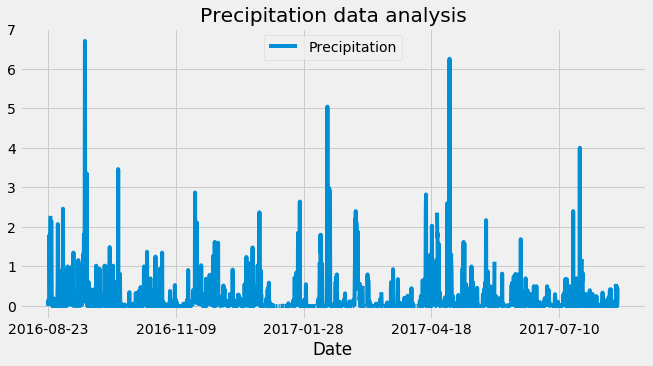

In [47]:
# Sort the dataframe by date - See Above

# Use Pandas Plotting with Matplotlib to plot the data
precip_df.plot(title="Precipitation data analysis", figsize=(10,5))
plt.legend(loc='upper center')
plt.savefig("Images/precipitation analysis.png")
plt.show()

In [48]:
# Use Pandas to calcualte the summary statistics for the precipitation data
precip_df.describe()

,Precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [50]:
# Design a query to show how many stations are available in this dataset?
stations = session.query(measurement.station).distinct().count()
stations

9

In [52]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
active_stations = session.query(measurement.station, func.count(measurement.station)).\
    group_by(measurement.station).\
    order_by(func.count(measurement.station).desc()).all()
active_stations

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [55]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?(1)
temp_query = [func.min(measurement.tobs), 
       func.max(measurement.tobs), 
       func.avg(measurement.tobs)]
temp_query

[<sqlalchemy.sql.functions.min at 0x17f0c68d8c8; min>,
 <sqlalchemy.sql.functions.max at 0x17f0c667b08; max>,
 <sqlalchemy.sql.functions.Function at 0x17f0c68ce88; avg>]

In [59]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?(2)
temp_records = session.query(*temp_query).\
    filter(measurement.station == 'USC00519281').all()
temp_records

[(54.0, 85.0, 71.66378066378067)]

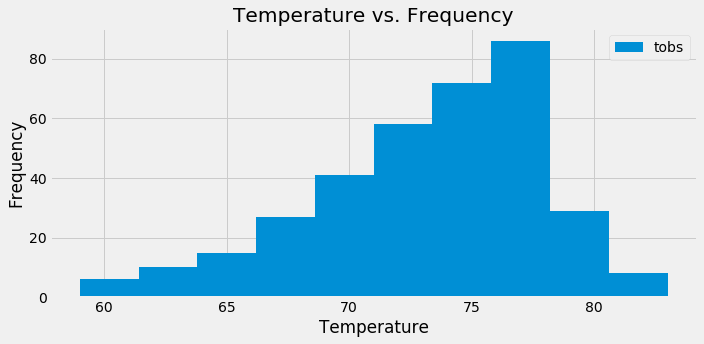

In [68]:
# Choose the station with the highest number of temperature observations.
#"USC00519281"

# Query the last 12 months of temperature observation data for this station 
high_tobs = session.query(measurement.tobs).\
    filter(measurement.date >= a_year_ago).\
    filter(measurement.station == "USC00519281").\
    order_by(measurement.date).all()

#and plot the results as a histogram
   # Save as a panda dataframe
high_tobs_df = pd.DataFrame(high_tobs, columns=['tobs'])
high_tobs_df

  #plot
high_tobs_df.plot.hist(title="Temperature vs. Frequency", figsize=(10,5))
plt.xlabel("Temperature")
plt.legend(loc="upper right")
plt.tight_layout()
plt.savefig("Images/temperature_vs_frequency.png")
plt.show()
 


## Bonus Challenge Assignment

In [70]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(measurement.tobs), func.avg(measurement.tobs), func.max(measurement.tobs)).\
        filter(measurement.date >= start_date).filter(measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [89]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.
mytrip_temp = calc_temps('2016-04-06', '2016-04-12')
mytrip_temp

[(65.0, 72.5111111111111, 78.0)]

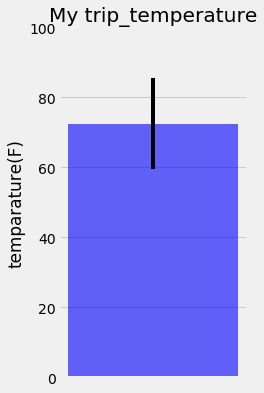

In [90]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)

min_temp = mytrip_temp[0][0]
avg_temp = mytrip_temp[0][1]
max_temp = mytrip_temp[0][2]


min_error = avg_temp - min_temp
max_error = max_temp - avg_temp

plt.figure(figsize=(3,6))
plt.bar(0,avg_temp, yerr=[max_temp-min_temp], color ='blue', alpha = .6)
plt.title('My trip_temperature')
plt.ylim(0,100)
plt.ylabel('temparature(F)')
plt.xticks([])
plt.savefig("Images/My Trip.png")
plt.show()

In [91]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation
start_date = '2016-04-06'
end_date = '2016-04-12'

s = session.query(station.station,
                 func.sum(measurement.prcp),
                 station.name,
                 station.latitude,
                 station.longitude,
                 station.elevation)\
    .filter(measurement.station == station.station)\
    .filter(measurement.date >= start_date)\
    .filter(measurement.date <= end_date)\
    .group_by(station.station)\
    .order_by(func.sum(measurement.prcp).desc())

for row in s:
    rain='{0:.2f}'.format(row[1])
    print(f'station: {row[0]}, rain: {rain} \n location: {row[2]}) \n elevation: {row[3]} \
    Latitude: {row[4]} Longitude: {row[5]}')
    print()
    
    

station: USC00516128, rain: 2.96 
 location: MANOA LYON ARBO 785.2, HI US) 
 elevation: 21.3331     Latitude: -157.8025 Longitude: 152.4

station: USC00519281, rain: 2.57 
 location: WAIHEE 837.5, HI US) 
 elevation: 21.45167     Latitude: -157.84888999999998 Longitude: 32.9

station: USC00513117, rain: 1.02 
 location: KANEOHE 838.1, HI US) 
 elevation: 21.4234     Latitude: -157.8015 Longitude: 14.6

station: USC00514830, rain: 0.38 
 location: KUALOA RANCH HEADQUARTERS 886.9, HI US) 
 elevation: 21.5213     Latitude: -157.8374 Longitude: 7.0

station: USC00519397, rain: 0.02 
 location: WAIKIKI 717.2, HI US) 
 elevation: 21.2716     Latitude: -157.8168 Longitude: 3.0

station: USC00519523, rain: 0.00 
 location: WAIMANALO EXPERIMENTAL FARM, HI US) 
 elevation: 21.33556     Latitude: -157.71139 Longitude: 19.5

station: USC00517948, rain: 0.00 
 location: PEARL CITY, HI US) 
 elevation: 21.3934     Latitude: -157.9751 Longitude: 11.9



In [92]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(measurement.tobs), func.avg(measurement.tobs), func.max(measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", measurement.date) == date).all()
    
daily_normals("01-01")

[(62.0, 69.15384615384616, 77.0)]

In [101]:
# Set the start and end date of the trip

start_date = '2016-04-06'
end_date = '2016-04-12'

# Use the start and end date to create a range of dates

start = dt.datetime.strptime("04-06", "%m-%d")
end = dt.datetime.strptime("04-12", "%m-%d")
date = [start + dt.timedelta(days=x) for x in range(0, (end-start).days)]

myTrip_Dates = []

for date in date:
    myTrip_Dates.append(date.strftime("%m-%d"))  
    
print(myTrip_Dates)

['04-06', '04-07', '04-08', '04-09', '04-10', '04-11']


In [133]:
# calculate the daily normals for your trip
# Stip off the year and save a list of %m-%d strings
# Loop through the list of %m-%d strings and calculate the normals for each date
normals = []
for day in myTrip_Dates:
    normals.append(daily_normals(day))
# push each tuple of calculations into a list called `normals`
normals

[[(67.0, 71.57142857142857, 77.0)],
 [(63.0, 71.10526315789474, 78.0)],
 [(66.0, 72.10526315789474, 77.0)],
 [(62.0, 71.6140350877193, 78.0)],
 [(64.0, 71.40350877192982, 79.0)],
 [(65.0, 72.49180327868852, 82.0)]]

In [131]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index
dates_df = pd.DataFrame(myTrip_Dates, columns=['Dates'])
dates_df



,Dates
0,04-06
1,04-07
2,04-08
3,04-09
4,04-10
5,04-11


In [132]:
normals_df = pd.DataFrame(normals, columns=['minimum', 'average', 'maximum'])


ValueError: 3 columns passed, passed data had 1 columns

In [ ]:
# Plot the daily normals as an area plot with `stacked=False`
